In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import TeraData
import numpy as np
import mpld3
import glob
from IPython.core.display import HTML
mpld3.enable_notebook()
%run TeraData.py

# Define the File names of reference and sample files

In [2]:
reffiles=glob.glob(r"C:\Users\david\Documents\messdaten\Ref*.txt")
samfiles=glob.glob(r"C:\Users\david\Documents\messdaten\Sam*.txt")
#check the glob
#reffiles

## Params can be adjustet for correctly import the files

In [3]:
 params={'time_factor':1,
            'time_col':0,
            'X_col':1,
            'Y_col':2,
            'dec_sep':'.',
            'skiprows':0}

Import the reference files and average them, Total of 6 files

Peak Position standard deviation: 3.48310937239fs
Time axis manipulation neccessary
Detrending of data, pulse shifting and averaging done
------------------------------------------------------------

Import the sample files and average them, Total of  5 files

Peak Position standard deviation: 2.33350435734fs
Time axis manipulation neccessary
Detrending of data, pulse shifting and averaging done
------------------------------------------------------------



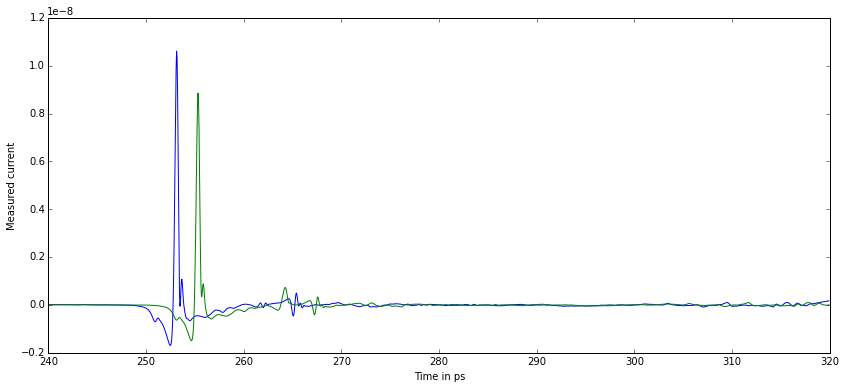

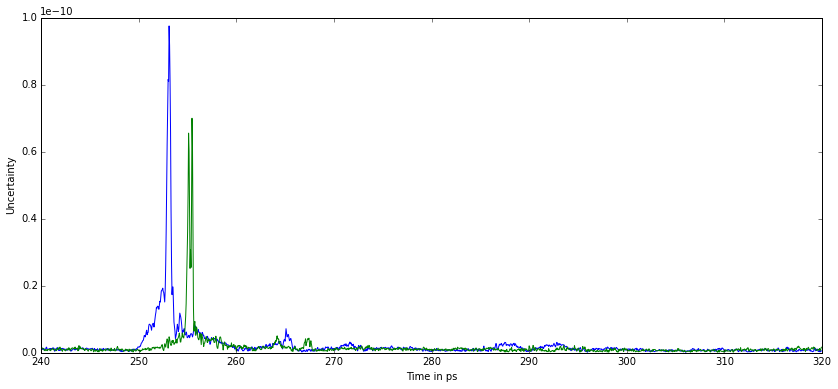

In [4]:
print("Import the reference files and average them, Total of " + str(len(reffiles)) + " files\n")
refdata=TimeDomainData.importMultipleFiles(reffiles,params)
print("Detrending of data, pulse shifting and averaging done")
print("------------------------------------------------------------\n")
print("Import the sample files and average them, Total of  " + str(len(samfiles)) + " files\n")
samdata=TimeDomainData.importMultipleFiles(samfiles,params)
print("Detrending of data, pulse shifting and averaging done")
print("------------------------------------------------------------\n")

plt.figure(figsize=(14,6))
plt.plot(refdata.getTimeAxisRef()*1e12,refdata.getEfield())
plt.plot(samdata.getTimeAxisRef()*1e12,samdata.getEfield())
plt.xlabel('Time in ps')
plt.ylabel('Measured current')
plt.figure(figsize=(14,6))
plt.plot(refdata.getTimeAxisRef()*1e12,refdata.getUncertainty())
plt.plot(samdata.getTimeAxisRef()*1e12,samdata.getUncertainty())
plt.xlabel('Time in ps')
plt.ylabel('Uncertainty')


# Fourier transform the data and show spectrum and phase information

Fourier transformation done


(-500, 0)

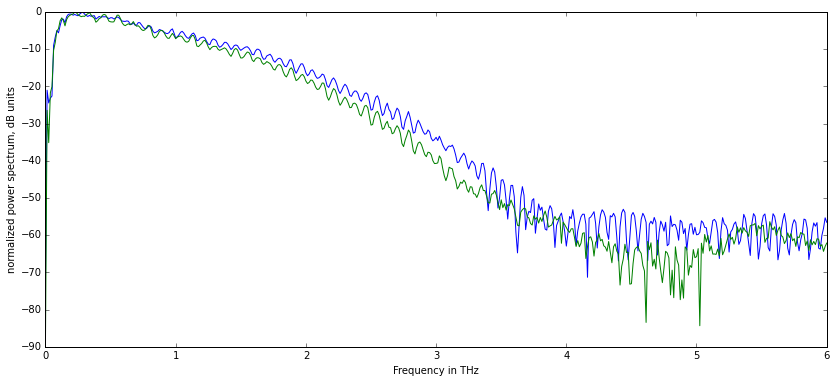

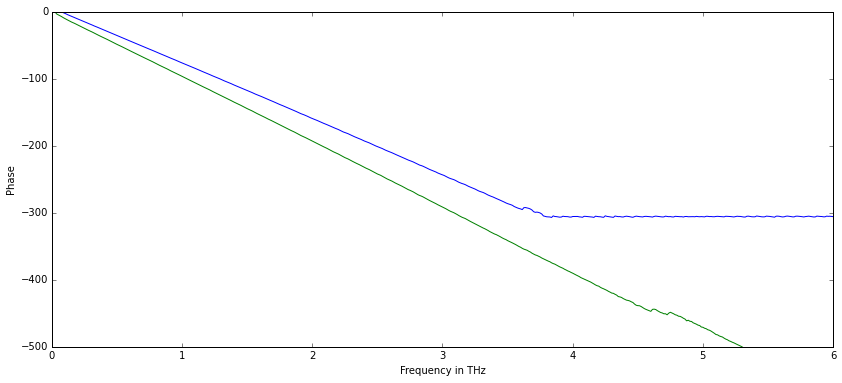

In [5]:
fdref=FrequencyDomainData.fromTimeDomainData(refdata)
fdsam=FrequencyDomainData.fromTimeDomainData(samdata)
print("Fourier transformation done")

plt.figure(figsize=(14,6))
absref=20*np.log10(abs(fdref.getSpectrumRef()))
abssam=20*np.log10(abs(fdsam.getSpectrumRef()))

plt.plot(fdref.getFrequenciesRef()/1e12,absref-max(absref))
plt.plot(fdsam.getFrequenciesRef()/1e12,abssam-max(abssam))
plt.xlabel('Frequency in THz')
plt.ylabel('normalized power spectrum, dB units')
plt.xlim((0,6))

plt.figure(figsize=(14,6))
plt.plot(fdref.getFrequenciesRef()/1e12,fdref.getPhasesRef())
plt.plot(fdsam.getFrequenciesRef()/1e12,fdsam.getPhasesRef())
plt.xlabel('Frequency in THz')
plt.ylabel('Phase')
plt.xlim((0,6))
plt.ylim((-500,0))


# Data properties

In [6]:
print("No of Reference Datasets: " +str(len(reffiles)))
print("No of Sample Datasets: " +str(len(samfiles)))

No of Reference Datasets: 6
No of Sample Datasets: 5


## time domain properties

In [7]:
raw_html = "<table><tr><td>&nbsp;</td><td><b>Reference</b> </td><td><b>Sample</b></td><td>Difference</td></tr>"
raw_html+="<tr><td>Peak Position</td><td>{:.2f}".format(refdata.getPeakPosition()*1e12) + " ps</td><td>{:.2f}".format(samdata.getPeakPosition()*1e12)+" ps</td><td>{:.2f}".format((refdata.getPeakPosition()-samdata.getPeakPosition())*1e12)+" ps</td></tr>"
raw_html+="<tr><td>Peak Width</td><td>{:.2f}".format(refdata.getPeakWidth()*1e12) + " ps</td><td>{:.2f}".format(samdata.getPeakWidth()*1e12)+" ps</td><td>{:.2f}".format((refdata.getPeakWidth()-samdata.getPeakWidth())*1e12)+" ps</td></tr>"
raw_html+="<tr><td>Time Step Width</td><td>{:.2f}".format(refdata.getTimeStep()*1e15) + " fs</td><td>{:.2f}".format(samdata.getTimeStep()*1e15)+" fs</td><td>{:.2f}".format((refdata.getTimeStep()-samdata.getTimeStep())*1e15)+" fs</td></tr>"
raw_html+="<tr><td>max DR</td><td>{:.2f}".format(refdata.getDynamicRange()) + "</td><td>{:.2f}".format(samdata.getDynamicRange())+"</td><td>{:.2f}".format((refdata.getDynamicRange()-samdata.getDynamicRange()))+" </td></tr>"
raw_html+= "</table>"
HTML(raw_html)

,Reference,Sample,Difference
Peak Position,253.12 ps,255.32 ps,-2.20 ps
Peak Width,0.00 ps,0.00 ps,0.00 ps
Time Step Width,49.90 fs,49.90 fs,0.00 fs
max DR,4294.31,3342.04,952.27


## frequency domain properties 


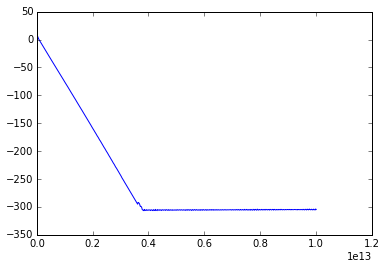

In [9]:
plt.plot(fdref.getFrequenciesRef(),fdref.getPhasesRef())